This is a messy workbook, prolly the most messiest one I have ever worked with, i will try to clean it up but maybe later

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
df = titanic.copy()

So the transported column of ours is the one which we have to predict, the y and the other columns preceeding it are the features. There is no need for the name, so we might as well drop it, or we can plot a corr matrix with the y

Those all are good things to do but we have to check for the mean and null values in the starting before doing anything else.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df['total_money_spent'] = df['RoomService'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] 

In [9]:
corr_matrix = df.corr()

In [10]:
corr_matrix['Transported'].sort_values(ascending=False)

Transported          1.000000
FoodCourt            0.046566
ShoppingMall         0.010141
Age                 -0.075026
VRDeck              -0.207075
Spa                 -0.221131
RoomService         -0.244611
total_money_spent   -0.331112
Name: Transported, dtype: float64

It seems there is a rather strong correlation between the money spent on the luxuries and the transported, 

In [11]:
df.Transported = df.Transported.replace({True:1, False:0})

In [12]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_money_spent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,727.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,6807.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3893.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1717.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,3588.0


<AxesSubplot:xlabel='Transported', ylabel='total_money_spent'>

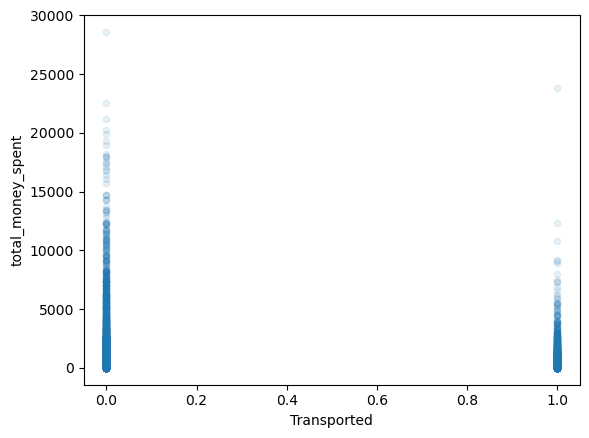

In [13]:
df.plot(kind='scatter', x='Transported',y='total_money_spent', alpha=0.1)

Apparently the plot between the total money spent and on the didn't quite work as planned

In [14]:
df.isnull().sum()

PassengerId            0
HomePlanet           201
CryoSleep            217
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
total_money_spent    740
dtype: int64

In [15]:
df.drop('Name', inplace=True, axis=1)

In [16]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_money_spent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,727.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,6807.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,3893.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,1717.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,3588.0


In [17]:
df.CryoSleep = df.CryoSleep.replace({True:1, False:0})

In [18]:
corr_matrix = df.corr()

In [19]:
corr_matrix['Transported'].sort_values(ascending=False)

Transported          1.000000
CryoSleep            0.468645
FoodCourt            0.046566
ShoppingMall         0.010141
Age                 -0.075026
VRDeck              -0.207075
Spa                 -0.221131
RoomService         -0.244611
total_money_spent   -0.331112
Name: Transported, dtype: float64

In [20]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [21]:
df.HomePlanet.isnull().sum()

201

In [22]:
df.HomePlanet = df.HomePlanet.replace({'Europa':0, 'Earth':1, 'Mars':2})

In [23]:
mean = df.HomePlanet.mean()
mean

0.9561940650023552

Since mean here is approximately closer to 1, we can estimate it as 1, we can replace the nan values with average stating that on an average people are coming from earth so we can go out on a limb and assume that all the nan values are coming from earth. 

In [24]:
median = df.HomePlanet.median()
median

1.0

In [25]:
mode = df.HomePlanet.mode()
mode

0    1.0
Name: HomePlanet, dtype: float64

I thought we can use other central tendencies to see which one is occuring the most often, and it turns out that earth is the mean, median and mode. So we use 1 to fill all the nan values in HomePlanet

In [26]:
df.HomePlanet.fillna(1.0, inplace=True)

In [27]:
df.HomePlanet.isnull().sum()

0

In [28]:
corr_matrix = df.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported          1.000000
CryoSleep            0.468645
FoodCourt            0.046566
ShoppingMall         0.010141
Age                 -0.075026
HomePlanet          -0.102240
VRDeck              -0.207075
Spa                 -0.221131
RoomService         -0.244611
total_money_spent   -0.331112
Name: Transported, dtype: float64

In [29]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [30]:
df.Destination.isnull().sum()

182

In [31]:
df.Destination = df.Destination.replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
mean = df.Destination.mean()
mean
mode = df.Destination.mode()
df.Destination.fillna(0.0, inplace=True)

In [32]:
df.Destination.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: Destination, Length: 8693, dtype: bool>

In [33]:
corr_matrix = df.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported          1.000000
CryoSleep            0.468645
Destination          0.108152
FoodCourt            0.046566
ShoppingMall         0.010141
Age                 -0.075026
HomePlanet          -0.102240
VRDeck              -0.207075
Spa                 -0.221131
RoomService         -0.244611
total_money_spent   -0.331112
Name: Transported, dtype: float64

In [34]:
df.VIP = df.VIP.replace({True:1, False:0})

In [35]:
corr_matrix = df.corr()
corr_matrix['Transported'].sort_values(ascending=False)

Transported          1.000000
CryoSleep            0.468645
Destination          0.108152
FoodCourt            0.046566
ShoppingMall         0.010141
VIP                 -0.037650
Age                 -0.075026
HomePlanet          -0.102240
VRDeck              -0.207075
Spa                 -0.221131
RoomService         -0.244611
total_money_spent   -0.331112
Name: Transported, dtype: float64

In [36]:
columns_to_drop = ['Cabin', 'PassengerId', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
                  'Spa', 'VRDeck']
df.drop(columns_to_drop, inplace=True, axis=1)

In [37]:
df

,HomePlanet,CryoSleep,Destination,Transported,total_money_spent
0,0.0,0.0,0.0,0,0.0
1,1.0,0.0,0.0,1,727.0
2,0.0,0.0,0.0,0,6807.0
3,0.0,0.0,0.0,0,3893.0
4,1.0,0.0,0.0,1,1021.0
...,...,...,...,...,...
8688,0.0,0.0,2.0,0,1717.0
8689,1.0,1.0,1.0,0,0.0
8690,1.0,0.0,0.0,1,1873.0
8691,0.0,0.0,2.0,0,3588.0


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
x = df.drop('Transported', axis=1)
y = df['Transported']

In [41]:
df.isnull().sum()

HomePlanet             0
CryoSleep            217
Destination            0
Transported            0
total_money_spent    740
dtype: int64

In [42]:
median = df.CryoSleep.median()
df.CryoSleep.fillna(median, inplace=True)

In [43]:
avg = df.total_money_spent.mean()
df.total_money_spent.fillna(avg, inplace=True)

In [44]:
df.isnull().sum()

HomePlanet           0
CryoSleep            0
Destination          0
Transported          0
total_money_spent    0
dtype: int64

In [45]:
x = df.drop('Transported', axis=1)

In [46]:
model.fit(x, y)

LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
y_train_pred = model.predict(x)

In [49]:
train_score = accuracy_score(y, y_train_pred)
train_score

0.7474979868860002

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [51]:
precision_score(y, y_train_pred)

0.8029419927837913

In [52]:
recall_score(y, y_train_pred)

0.6608040201005025

In [53]:
titanic_test = pd.read_csv('test.csv')

In [54]:
pdf = titanic_test.copy()
pdf

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [55]:
pdf.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
pdf

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [58]:
pdf.VIP = pdf.VIP.replace({True:1, False:0})

In [59]:
pdf.Destination.fillna(0.0, inplace=True)

In [60]:
pdf.HomePlanet = pdf.HomePlanet.replace({'Europa':0, 'Earth':1, 'Mars':2})

In [63]:
pdf.CryoSleep = pdf.CryoSleep.replace({True:1, False:0})
pdf

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1.0,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,1.0,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0.0,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0.0,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,1.0,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,1.0,0.0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,2.0,1.0,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,0.0,0.0,0.0,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [72]:
x

,HomePlanet,CryoSleep,Destination,total_money_spent
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,727.0
2,0.0,0.0,0.0,6807.0
3,0.0,0.0,0.0,3893.0
4,1.0,0.0,0.0,1021.0
...,...,...,...,...
8688,0.0,0.0,2.0,1717.0
8689,1.0,1.0,1.0,0.0
8690,1.0,0.0,0.0,1873.0
8691,0.0,0.0,2.0,3588.0


In [66]:
pdf['total_money_spent'] = pdf['RoomService'] + pdf['ShoppingMall'] + pdf['Spa'] + pdf['VRDeck'] 
pdf

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,total_money_spent
0,1.0,1.0,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0
1,1.0,0.0,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2823.0
2,0.0,1.0,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0
3,0.0,0.0,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,766.0
4,1.0,0.0,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0
4273,1.0,0.0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,171.0
4274,2.0,1.0,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0.0
4275,0.0,0.0,0.0,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,523.0


In [73]:
pdf.drop(['Name', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True, axis=1)
pdf.Destination = pdf.Destination.replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})


KeyError: "['Name', 'RoomService', 'ShoppingMall', 'Spa', 'VRDeck'] not found in axis"

In [75]:
pdf.drop(['Age', 'VIP', 'FoodCourt'], inplace=True, axis=1)


KeyError: "['Age', 'VIP', 'FoodCourt'] not found in axis"

In [78]:
pdf.isnull().sum()

HomePlanet            87
CryoSleep             93
Destination            0
total_money_spent    353
dtype: int64

In [80]:
pdf.HomePlanet.fillna(1.0, inplace=True)
pdf.CryoSleep.fillna(pdf.CryoSleep.median(), inplace=True)


In [81]:
avg = pdf.total_money_spent.mean()

In [83]:
pdf.total_money_spent.fillna(avg, inplace=True)

In [84]:
pdf.isnull().sum()

HomePlanet           0
CryoSleep            0
Destination          0
total_money_spent    0
dtype: int64

In [85]:
y_test_predictions = model.predict(pdf)

In [95]:
import csv 
indicies=titanic_test['PassengerId']
indicies

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [100]:
test_predictions = pd.DataFrame(y_test_predictions, index=indicies)
test_predictions.rename({0: 'Transported'}, inplace=True, axis=1)

In [105]:
test_predictions.Transported.replace({0: False, 1: True}, inplace=True)

In [103]:
test_predictions.to_csv('submission.txt')

In [106]:
test_predictions

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,True


In [107]:
test_predictions.to_csv('submission.txt')